In [ ]:
# 01 — Setup & EDA
Notebook awal untuk:
1) mengecek environment & dependensi,
2) memuat dataset UCI Predict Students’ Dropout and Academic Success,
3) eksplorasi data (EDA) dasar: struktur, missing values, distribusi target, ringkasan numerik/kategorikal,
4) menyimpan salinan dataset bersih (opsional).

> Jalankan cell dari atas ke bawah. Jika ada error path dataset, ubah variabel `CSV_PATH` di Cell 4.


In [1]:
import sys, platform
print("Python :", sys.version)
print("Platform:", platform.platform())


Python : 3.13.3 (tags/v3.13.3:6280bb5, Apr  8 2025, 14:47:33) [MSC v.1943 64 bit (AMD64)]
Platform: Windows-11-10.0.26100-SP0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan lebih banyak kolom saat display
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Style plotting
sns.set()


In [4]:
# Struktur proyek (relative terhadap folder notebooks/)
PROJECT_ROOT = Path("..").resolve()
DATA_DIR     = PROJECT_ROOT / "data"
FIG_DIR      = PROJECT_ROOT / "figures"
REPORTS_DIR  = PROJECT_ROOT / "reports"

for d in [DATA_DIR, FIG_DIR, REPORTS_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# ===> Ubah sesuai nama file CSV kamu di folder ../data
CSV_PATH = DATA_DIR / "student_data.csv"

if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Dataset tidak ditemukan di {CSV_PATH}.\n"
        f"Taruh file CSV dataset UCI di folder data/, lalu sesuaikan nama file pada variabel CSV_PATH."
    )

CSV_PATH


WindowsPath('C:/Penelitian_Prediksi_Dropout/data/student_data.csv')

In [5]:
# Membaca CSV
df_raw = pd.read_csv(CSV_PATH)

# Salin untuk diolah (agar df_raw tetap jadi referensi mentah)
df = df_raw.copy()

print("Loaded:", CSV_PATH.name)
print("Shape :", df.shape)
df.head()


Loaded: student_data.csv
Shape : (4424, 1)


,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...


In [1]:
# Normalisasi nama kolom ke snake_case
def to_snake(s: str) -> str:
    return (
        s.strip()
         .replace("/", " ")
         .replace("-", " ")
         .replace(".", " ")
         .replace("(", " ")
         .replace(")", " ")
         .lower()
         .replace(" ", "_")
    )

df.columns = [to_snake(c) for c in df.columns]

# Deteksi kolom target secara fleksibel
cand_targets = [c for c in df.columns if c in {"target", "status", "final_status"}]
if len(cand_targets) == 0:
    # fallback: cari kolom berisi tiga kelas khas dataset (Dropout/Enrolled/Graduate)
    cats_like = []
    for c in df.columns:
        if df[c].dtype == "O":
            vals = set(str(v).lower() for v in df[c].dropna().unique())
            if {"dropout", "enrolled", "graduate"} & vals:
                cats_like.append(c)
    cand_targets = cats_like

if len(cand_targets) == 0:
    print("PERINGATAN: Kolom target tidak terdeteksi otomatis. Harap set manual, contoh:")
    print("target_col = 'target'")
    target_col = None
else:
    target_col = cand_targets[0]

print("Target column:", target_col)
df.head()


NameError: name 'df' is not defined

In [3]:
from pathlib import Path
import pandas as pd

# 1. path ke file dataset
CSV_PATH = Path("../data/student_data.csv")   # sesuaikan kalau nama filenya beda

# 2. baca CSV dengan pemisah ;
df = pd.read_csv(CSV_PATH, sep=";")

print("Loaded:", CSV_PATH.name)
print("Shape :", df.shape)

df.head()


Loaded: student_data.csv
Shape : (4424, 37)


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
def to_snake(s: str) -> str:
    return (
        s.strip()
        .replace("/", " ")
        .replace("-", " ")
        .replace(".", " ")
        .replace("(", " ")
        .replace(")", " ")
        .replace("’", "")   # kalau ada apostrophe aneh
        .replace("'", "")   # apostrophe biasa
        .lower()
        .replace(" ", "_")
    )

df.columns = [to_snake(c) for c in df.columns]

df.columns


Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification__grade_', 'nacionality',
       'mothers_qualification', 'fathers_qualification', 'mothers_occupation',
       'fathers_occupation', 'admission_grade', 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age_at_enrollment', 'international',
       'curricular_units_1st_sem__credited_',
       'curricular_units_1st_sem__enrolled_',
       'curricular_units_1st_sem__evaluations_',
       'curricular_units_1st_sem__approved_',
       'curricular_units_1st_sem__grade_',
       'curricular_units_1st_sem__without_evaluations_',
       'curricular_units_2nd_sem__credited_',
       'curricular_units_2nd_sem__enrolled_',
       'curricular_units_2nd_sem__evaluations_',
       'curricular_units_2nd_sem__approved_',
       'curricular_units_2nd_sem__grade_'

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime_evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification__grade_                  4424 non-null   float64
 7   nacionality                                     4424 non-null   int64  
 8   mothers_qualification                           4424 non-null   int64  
 9   fathers_qualification                    

In [6]:
df.isna().sum().sort_values(ascending=False)


marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime_evening_attendance                        0
previous_qualification                            0
previous_qualification__grade_                    0
nacionality                                       0
mothers_qualification                             0
fathers_qualification                             0
mothers_occupation                                0
fathers_occupation                                0
admission_grade                                   0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrol

In [7]:
df['target'].value_counts()


target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

<Axes: xlabel='target'>

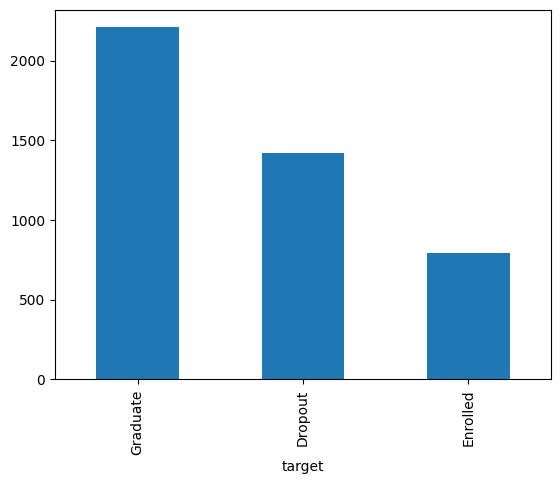

In [8]:
df['target'].value_counts().plot(kind='bar')


In [9]:
df.describe()


,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification__grade_,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_1st_sem__without_evaluations_,curricular_units_2nd_sem__credited_,curricular_units_2nd_sem__enrolled_,curricular_units_2nd_sem__evaluations_,curricular_units_2nd_sem__approved_,curricular_units_2nd_sem__grade_,curricular_units_2nd_sem__without_evaluations_,unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000
